<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/250_gauss_jordan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema lineales de ecuaciones

## Sistemas 2x2
Consideremos los siguientes sistemas 2x2:
### Ejemplo 1.A
$$
\begin{cases}
x + y = 3 \\
x - y = 1
\end{cases}
$$

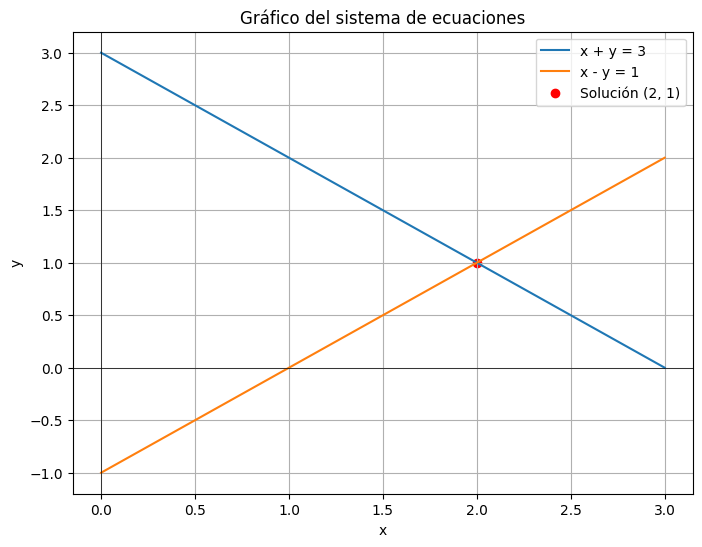

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las ecuaciones
def ecuacion1(x):
    return 3 - x

def ecuacion2(x):
    return x - 1

# Valores de x para graficar
x_vals = np.linspace(0, 3, 400)

# Graficar las ecuaciones
plt.figure(figsize=(8, 6))
plt.plot(x_vals, ecuacion1(x_vals), label='x + y = 3')
plt.plot(x_vals, ecuacion2(x_vals), label='x - y = 1')

# Marcar el punto de intersección (2, 1)
plt.scatter(2, 1, color='red', label='Solución (2, 1)')

# Añadir detalles al gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico del sistema de ecuaciones')
plt.legend()
plt.grid(True)
plt.show()


### Ejemplo 1.B
$$
\begin{cases}
x + y = 3 \\
2x + 2y = 5
\end{cases}
$$

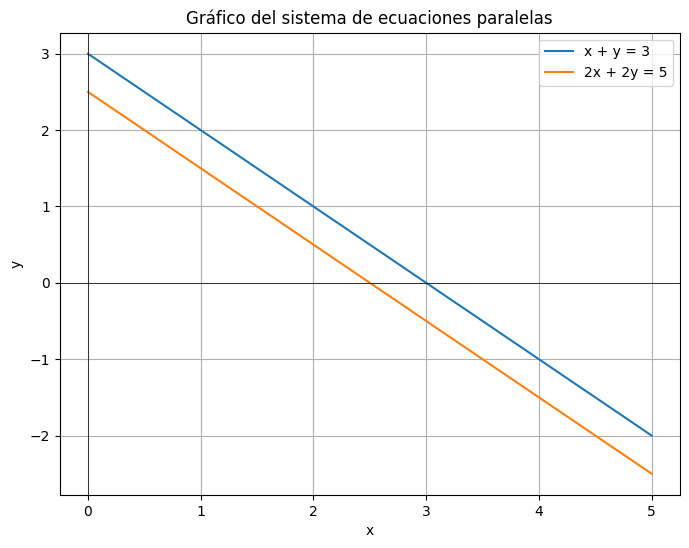

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las ecuaciones
def ecuacion1(x):
    return 3 - x

def ecuacion2(x):
    return (5 - 2*x) / 2  # Despejamos y en 2x + 2y = 5

# Valores de x para graficar
x_vals = np.linspace(0, 5, 400)

# Graficar las ecuaciones
plt.figure(figsize=(8, 6))
plt.plot(x_vals, ecuacion1(x_vals), label='x + y = 3')
plt.plot(x_vals, ecuacion2(x_vals), label='2x + 2y = 5')

# Añadir detalles al gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico del sistema de ecuaciones paralelas')
plt.legend()
plt.grid(True)
plt.show()

### Ejemplo 1.C
$$
\begin{cases}
x + y = 3 \\
2x + 2y = 6
\end{cases}
$$

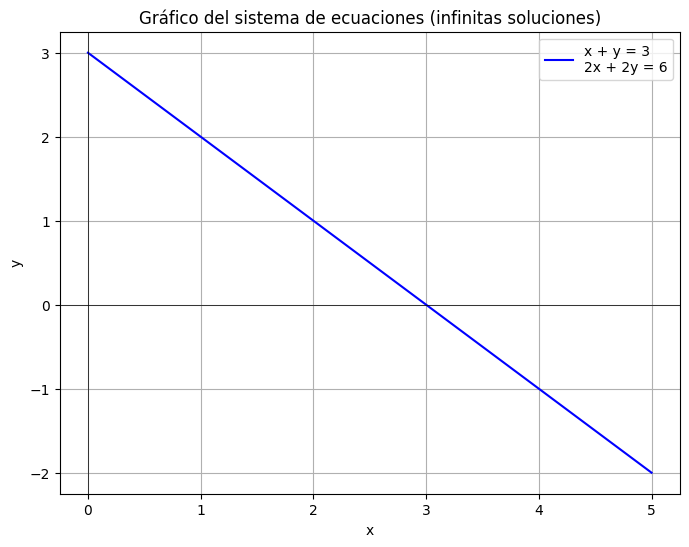

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la ecuación (ambas son iguales)
def ecuacion(x):
    return 3 - x

# Valores de x para graficar
x_vals = np.linspace(0, 5, 400)

# Graficar la ecuación
plt.figure(figsize=(8, 6))
plt.plot(x_vals, ecuacion(x_vals), label='x + y = 3 \n2x + 2y = 6', color='blue')

# Añadir detalles al gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico del sistema de ecuaciones (infinitas soluciones)')
plt.legend()
plt.grid(True)
plt.show()


## Matricialmente
Para el primer sistema de ecuaciones, el que tiene una solución única:

$$
\begin{cases}
x + y = 3 \\
x - y = 1
\end{cases}
$$

La expresión matricial es:

$$
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}
=
\begin{pmatrix}
3 \\
1
\end{pmatrix}
$$

Para obtener la **matriz ampliada** $[A | \mathbf{b}]$ del sistema simplemente añadimos el vector $\mathbf{b}$ como una columna adicional a la matriz $A$:

$$
[A | \mathbf{b}] =
\begin{pmatrix}
1 & 1 & | & 3 \\
1 & -1 & | & 1
\end{pmatrix}
$$


Vamos a transformar la matriz ampliada en su forma escalonada reducida por filas (Gauss-Jordan), explicando cada paso y el papel del **pivote**:

---

### Matriz ampliada inicial:
$$
\begin{pmatrix}
1 & 1 & | & 3 \\
1 & -1 & | & 1
\end{pmatrix}
$$

---

### Paso 1: Escalonar hacia abajo (hacer ceros abajo del pivote)

**Pivote inicial:** El elemento $a_{11} = 1$ (primera fila, primera columna).

**Objetivo:** Hacer cero el elemento $a_{21} = 1$ (debajo del pivote).

**Operación:** $F_2 \leftarrow F_2 - F_1$

$$
\begin{pmatrix}
1 & 1 & | & 3 \\
1 - 1 & -1 - 1 & | & 1 - 3
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 & | & 3 \\
0 & -2 & | & -2
\end{pmatrix}
$$

---
### Paso 2: Normalizar la segunda fila (pivote = 1)

**Pivote actual:** $a_{22} = -2$.

**Operación:** $F_2 \leftarrow \frac{F_2}{-2}$

$$
\begin{pmatrix}
1 & 1 & | & 3 \\
0 & 1 & | & 1
\end{pmatrix}
$$

---
### Paso 3: Escalonar hacia arriba (hacer cero arriba del pivote)

**Pivote actual:** $a_{22} = 1$.

**Objetivo:** Hacer cero el elemento $a_{12} = 1$ (arriba del pivote).

**Operación:** $F_1 \leftarrow F_1 - F_2$

$$
\begin{pmatrix}
1 - 0 & 1 - 1 & | & 3 - 1 \\
0 & 1 & | & 1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & | & 2 \\
0 & 1 & | & 1
\end{pmatrix}
$$

---
### Resultado final: Matriz escalonada reducida
$$
\begin{pmatrix}
1 & 0 & | & 2 \\
0 & 1 & | & 1
\end{pmatrix}
$$

---
### Interpretación:
- La solución del sistema es $x = 2$ e $y = 1$.
- **Pivotes:** Los elementos $a_{11} = 1$ y $a_{22} = 1$ (tras normalizar).
- **Proceso:**
  1. Usamos el primer pivote para hacer cero debajo.
  2. Normalizamos la segunda fila para que el pivote sea 1.
  3. Usamos el segundo pivote para hacer cero arriba.

---
### Resumen de operaciones:
1. **Hacia abajo:** Eliminamos el elemento debajo del primer pivote.
2. **Normalización:** Convertimos el segundo pivote en 1.
3. **Hacia arriba:** Eliminamos el elemento encima del segundo pivote.